In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

### Repetition: simple linear regression

In [2]:
auto = pd.read_csv("auto.csv")
auto.head()

,name,displacement,cylinders,horsepower,weight,year,fuel_consumption
0,chevrolet chevelle malibu,5.03,8,130.0,1589.39,70,13.07
1,buick skylark 320,5.74,8,165.0,1675.12,70,15.68
2,plymouth satellite,5.21,8,150.0,1558.54,70,13.07
3,amc rebel sst,4.98,8,150.0,1557.18,70,14.70
4,ford torino,4.95,8,140.0,1564.44,70,13.84


We want to model the fuel consumption.

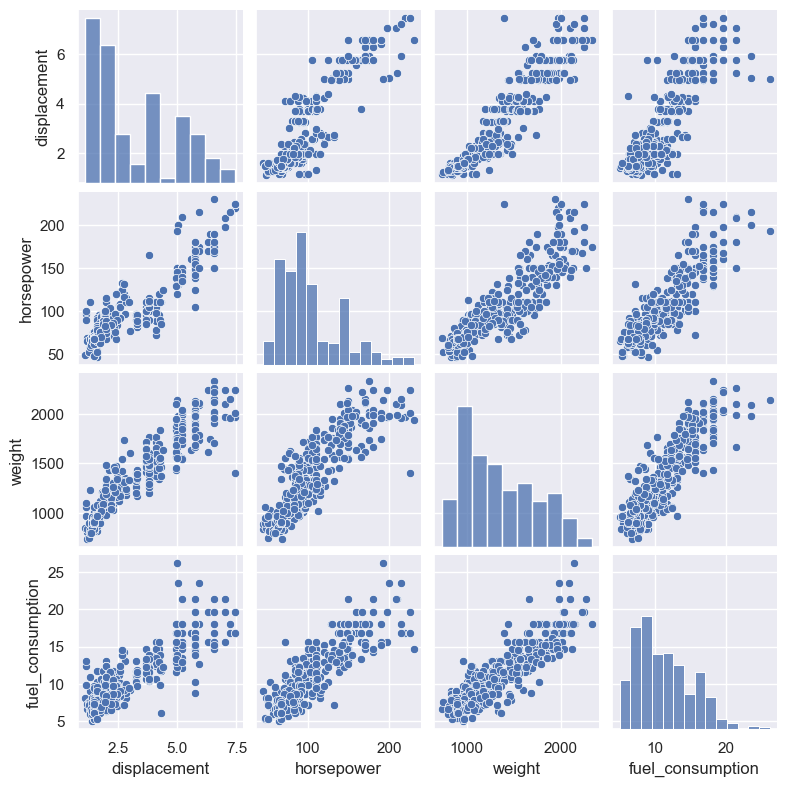

In [3]:
sns.set_theme()
sns.pairplot(data=auto[["displacement", "horsepower", "weight", "fuel_consumption"]], height=2)
plt.show()

In [4]:
model = LinearRegression()
model.fit(X= auto[["weight"]], y= auto["fuel_consumption"])

print("Slope: ", model.coef_)
print("Intercept: ", model.intercept_)

# Modell zur Verbrauchsprognose anwenden:
auto["fuel_consumption_pred"] = model.predict(auto[["weight"]])
auto.head()

Slope:  [0.00898938]
Intercept:  -0.8927080038069661


,name,displacement,cylinders,horsepower,weight,year,fuel_consumption,fuel_consumption_pred
0,chevrolet chevelle malibu,5.03,8,130.0,1589.39,70,13.07,13.394918
1,buick skylark 320,5.74,8,165.0,1675.12,70,15.68,14.165577
2,plymouth satellite,5.21,8,150.0,1558.54,70,13.07,13.117596
3,amc rebel sst,4.98,8,150.0,1557.18,70,14.70,13.105370
4,ford torino,4.95,8,140.0,1564.44,70,13.84,13.170633


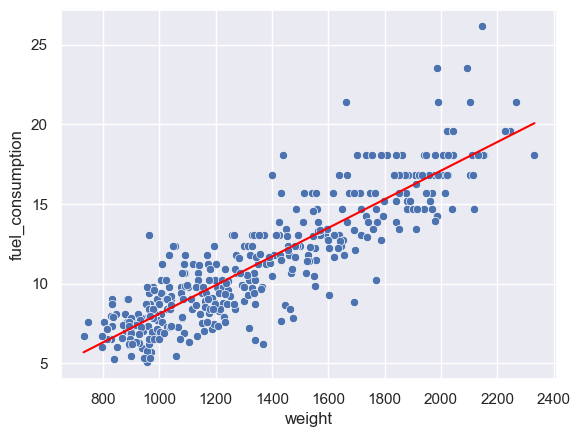

In [5]:
ax = sns.scatterplot(data=auto, x="weight", y="fuel_consumption")
sns.lineplot(ax=ax, x= auto["weight"], y=auto["fuel_consumption_pred"], color="red")
plt.show()

#### Determine $R^2$

First, explicitly: $R^2 = 1 - \frac{RSS}{TSS} = 1 - \frac{\sum_{i=1}^n (y_i - f(x_i))^2}{\sum_{i=1}^n (y_i - \bar{y})^2}$

In [6]:
RSS = np.sum((auto["fuel_consumption"] - auto["fuel_consumption_pred"])**2)

TSS = np.sum((auto["fuel_consumption"] - auto["fuel_consumption"].mean())**2)

R2 = 1 - RSS/TSS
R2

0.7832815756988709

Now, use the method `score()`. Every model in Scikit-Learn implements this method. Larger values are always better. The function specifies the typical evaluation parameter for the model. For linear regression it is the coefficient of determination $R^2$ but for other models some other metrics might be used.

In [7]:
model.score(X= auto[["weight"]], y= auto["fuel_consumption"])

0.7832815756988709

### Alternative quality measure: Mean Squared Error

The mean squared error gives the average of the squared residuals. (Compare the formula with RSS.):

$MSE=\frac{1}{n} \cdot \sum_{i=1}^n(y_i - f(x_i))^2$

In [8]:
np.mean((auto["fuel_consumption"] - auto["fuel_consumption_pred"])**2)

3.3104389574456192

In [9]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=auto["fuel_consumption"], y_pred=auto["fuel_consumption_pred"])

3.3104389574456192

### Multidimensional Regression

Now, in addition to **weight**, we want to also use **horsepower** as an explanatory variable for **fuel_consumption**.

In [10]:
model_mult = LinearRegression()
model_mult.fit(X= auto[["weight", "horsepower"]], y= auto["fuel_consumption"])

print("Slope: ", model_mult.coef_)
print("Intercept: ", model_mult.intercept_)

# use model to predict consumption:
auto["fuel_consumption_pred2"] = model_mult.predict(auto[["weight", "horsepower"]])

print("R2: ", model_mult.score(X= auto[["weight", "horsepower"]], y= auto["fuel_consumption"]))
print("MSE: ", mean_squared_error(y_true=auto["fuel_consumption"], y_pred=auto["fuel_consumption_pred2"]))
auto.head()

Slope:  [0.00587258 0.03608626]
Intercept:  -0.4530518010381961
R2:  0.8151013083399457
MSE:  2.824382993859651


,name,displacement,cylinders,horsepower,weight,year,fuel_consumption,fuel_consumption_pred,fuel_consumption_pred2
0,chevrolet chevelle malibu,5.03,8,130.0,1589.39,70,13.07,13.394918,13.571989
1,buick skylark 320,5.74,8,165.0,1675.12,70,15.68,14.165577,15.338465
2,plymouth satellite,5.21,8,150.0,1558.54,70,13.07,13.117596,14.112545
3,amc rebel sst,4.98,8,150.0,1557.18,70,14.70,13.105370,14.104558
4,ford torino,4.95,8,140.0,1564.44,70,13.84,13.170633,13.786331


Now compare the values of the multidimensional model with those of the one-dimensional model:

- First of all, it is noticeable that the coefficient of determination has risen from $0.783$ to $0.815$, i.e. the multidimensional model explains a slightly larger proportion of the variability. As expected, the mean-squared error fell from $3.31$ to $2.82$. The multidimensional model is therefore slightly better than the one-dimensional model.

- If you compare the slope coefficients for **weight** from the one-dimensional model ($0.00898938 \frac{l}{100km \cdot kg}$) and the multidimensional model ($0.00587258 \frac{l}{100km \cdot kg}$), you can see that this is now slightly smaller.
This is because the multidimensional model also takes into account the consumption attributable to the **hosepower**. This allows it to determine what proportion of consumption is due to weight and what proportion is due to horsepower.

You could also calculate the coefficients independently, because we know that
$\hat{\vec{\beta}} = (X^T X)^{-1} X^T \vec{y}$

Note: if you want to model an intercept, $X$ must contain a column of ones.

In [11]:
auto["one"]=1
X = auto[["one", "weight", "horsepower"]].values

y = auto["fuel_consumption"].values

In [12]:
np.linalg.inv(X.T @ X) @ X.T @ y

array([-0.4530518 ,  0.00587258,  0.03608626])